In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.neighbors import KNeighborsRegressor as KNNreg
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import random

from sklearn.dummy import DummyRegressor

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, Normalizer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import seaborn as sns

%matplotlib notebook

In [2]:
df19 = pd.read_csv("June19_cleaned.csv")
df19.drop("Unnamed: 0", axis=1, inplace=True)
df20 = pd.read_csv("June20_cleaned.csv")
df20.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
df19_cols = df19.columns.tolist()
df20_cols = df20.columns.tolist()

m19,n19 = df19.shape
m20,n20 = df20.shape

print("m19: ", m19, "n19: ", n19)
print("m20: ", m20, "n20: ", n20)

m19:  8143 n19:  258
m20:  6942 n20:  256


In [4]:
y_col = "review_scores_rating"
X19_cols = []

for col in df19_cols:
    if y_col != col:
        X19_cols.append(col) 

X20_cols = []
for col in df20_cols:
    if y_col != col:
        X20_cols.append(col) 
        
print(y_col, "is in X19_cols: ", y_col in X19_cols)
print(y_col, "is in X20_cols: ", y_col in X20_cols)

review_scores_rating is in X19_cols:  False
review_scores_rating is in X20_cols:  False


93.5624462728724
93.37712474791127


<IPython.core.display.Javascript object>


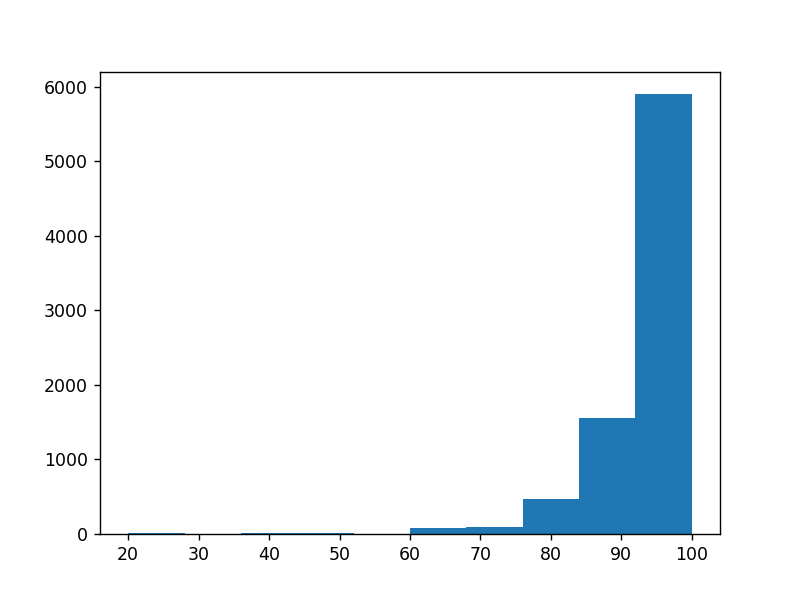

(array([8.000e+00, 2.000e+00, 1.600e+01, 7.000e+00, 1.000e+00, 8.700e+01,
        9.500e+01, 4.670e+02, 1.554e+03, 5.906e+03]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

In [16]:
X19 = df19[X19_cols].copy()
y19 = df19[y_col].copy()

X20 = df20[X20_cols].copy()
y20 = df20[y_col].copy()

print(y19.mean())
print(y20.mean())

# Train_test_split

In [8]:
X19_train, X19_test, y19_train, y19_test = train_test_split(X19, y19, test_size=0.2, random_state=42)
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.2, random_state=42)

# 2019

# Rough tune

In [7]:
scaler = StandardScaler()
scoring = "neg_mean_squared_error"
k_range = np.array(range(1,261,10))
#k_range = np.array(range(1,10))
p_range = np.array(range(1,5))
#p_range = np.array(2**p_powers)

mse_mean_scores = np.zeros([len(k_range), len(p_range)])
mse_std_scores = np.zeros([len(k_range), len(p_range)])

r2_mean_scores = np.zeros([len(k_range), len(p_range)])
r2_std_scores = np.zeros([len(k_range), len(p_range)])

k_cv = 5

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)

mse_dummyscores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 
print("MSE dummy score:", np.mean(mse_dummyscores), "+/-", np.std(mse_dummyscores))

r2_dummyscores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring='r2') 
print("r2 dummy score:", np.mean(r2_dummyscores), "+/-", np.std(r2_dummyscores))

mse_mean_scores[:,len(p_range)-1] = np.mean(mse_dummyscores)
mse_std_scores[:,len(p_range)-1] = np.std(mse_dummyscores)
#r2_mean_scores[:,len(p_range)-1] = np.mean(r2_dummyscores)
#r2_std_scores[:,len(p_range)-1] = np.std(r2_dummyscores)

for i, k in enumerate(k_range):
    for j, p in enumerate(p_range):
        
        print("k:",k)
        print("p:",p)
        model = KNNreg(n_neighbors=k, p=p, weights='distance', metric='minkowski')
        pipesteps = [('scaler', scaler), ('model', model)]
        pipe = Pipeline(pipesteps)
        
        mse_scores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 
        #r2_scores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring='r2') 
        
        print("-mse: ", np.mean(mse_scores), "+/-", np.std(mse_scores))
        #print("-r2: ", np.mean(r2_scores), "+/-", np.std(r2_scores))
        
        mse_mean_scores[i,j] = np.mean(mse_scores)
        mse_std_scores[i,j] = np.std(mse_scores)
        
        #r2_mean_scores[i,j] = np.mean(r2_scores)
        #r2_std_scores[i,j] = np.std(r2_scores)

NameError: name 'scoring' is not defined

In [ ]:
scaler = StandardScaler()
scoring = 'neg_mean_squared_error'
k_range = np.array(range(1,261,10))
#k_range = np.array(range(1,10))
p_range = np.array(range(1,5))
#p_range = np.array(2**p_powers)

mse_scores_rough_test = np.zeros([len(k_range), len(p_range)])

k_cv = 5

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)

scoring = "neg_mean_squared_error"

for i, k in enumerate(k_range):
    for j, p in enumerate(p_range):
        
        print("k:",k)
        print("p:",p)
        model = KNNreg(n_neighbors=k, p=p, weights='distance', metric='minkowski')
        pipesteps = [('scaler', scaler), ('model', model)]
        pipe = Pipeline(pipesteps)
        
        pipe.fit(X19_train, y19_train)
        y19_pred = pipe.predict(X19_test)
        mse_score_test = -mean_squared_error(y19_test, y19_pred)
        
        print("-mse test score: ", mse_score_test)
        
        mse_scores_rough_test[i, j] = mse_score_test

In [ ]:
mse_mean_scores_rough = mse_mean_scores 
mse_std_scores_rough = mse_std_scores
k_range = np.array(range(1,261,10))

mse_mean_dummy = np.mean(mse_dummyscores)
mse_std_dummy = np.std(mse_dummyscores)

mse_mean_dummy_array = np.ones(len(k_range))*mse_mean_dummy
mse_std_dummy_array = np.ones(len(k_range))*mse_std_dummy

start = 1
stop = len(k_range)

fig = plt.figure()
ax0 = fig.add_subplot(312)
capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
test_ms = 6
test_marker="s"
dummy_marker = "o"
dummy_ms = 5
dummy_colour = "magenta"

p1_colour = "blue"

linestyle=":"
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,0], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, color=p1_colour, label="p = 1")
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,1], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, label="p = 2")
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,2], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, label="p = 3")
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,3], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, label="p = 4")
ax0.errorbar(k_range[start:stop], mse_mean_dummy_array[start:stop], mse_std_dummy_array[start:stop], color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax0.legend()
ax0.set_ylabel("Negative Mean Squared Error +/- SD (nMSE)")
#ax0.set_xlabel("Number of Nearest Neighbours, k")
ax0.set_title("(b) Test Scores")
ax0.set_xticks(np.array(range(11,261,10)))
ax0.set_xticklabels([])
ax0.legend(loc="lower right", ncol=3)

ax1 = fig.add_subplot(311)
capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
CV_ms = 5
CV_marker="D"
linestyle=":"
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,0], mse_std_scores_rough[start:stop,0], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, color=p1_colour,  label="p = 1")
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,1], mse_std_scores_rough[start:stop,1],linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 2")
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,2], mse_std_scores_rough[start:stop,2], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 3")
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,3], mse_std_scores_rough[start:stop,3], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 4")
ax1.errorbar(k_range[start:stop], mse_mean_dummy_array[start:stop], mse_std_dummy_array[start:stop], color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax1.legend()
#ax1.set_ylabel("Negative Mean Squared Error +/- SD (nMSE)")
#ax1.set_xlabel("Number of Nearest Neighbours, k")
ax1.set_title("(a) Mean 5-fold CV Scores")
ax1.set_xticks(np.array(range(11,261,10)))
ax1.set_xticklabels([])
ax1.legend(loc="lower right", ncol=3)

ax2 = fig.add_subplot(313)
capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
linestyle=":"
zoom_start = 3
zoom_stop = 9
ax2.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,0], mse_std_scores_rough[start:stop,0], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth,color=p1_colour , label="CV Score")
ax2.plot(k_range[start:stop], mse_scores_rough_test[start:stop,0], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth,color=p1_colour, label="Test Score")
ax2.errorbar(k_range[start:stop], mse_mean_dummy_array[start:stop], mse_std_dummy_array[start:stop], color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax2.set_xlabel("Number of Nearest Neighbours, k")
ax2.set_title("(c) Mean 5-fold CV and Test Scores for p=1")
ax2.set_xticks(k_range[zoom_start:zoom_stop])
ax2.set_xticks(np.array(range(11,261,10)))
ax2.set_xticklabels(list(map(str,np.array(range(11,261,10)))), rotation=90)
ax2.legend(loc="lower right", ncol=3)
fig.set_size_inches([8,8])
#fig.tight_layout()

In [ ]:
k_range = np.array(range(1,261,10))

mse_mean_dummy = np.mean(mse_dummyscores)
mse_std_dummy = np.std(mse_dummyscores)

mse_mean_dummy_array = np.ones(len(k_range))*mse_mean_dummy
mse_std_dummy_array = np.ones(len(k_range))*mse_std_dummy

fig = plt.figure()
ax1 = fig.add_subplot(121)
capsize = 5
capthick = 0
elinewidth = 0.5
linewidth = 1
ms = 5
marker="*"
linestyle=":"
ax1.errorbar(k_range, mse_mean_scores[:,0], mse_std_scores[:,0], linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth,  label="p = 1")
ax1.errorbar(k_range, mse_mean_scores[:,1], mse_std_scores[:,1],linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 2")
ax1.errorbar(k_range, mse_mean_scores[:,2], mse_std_scores[:,2], linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 3")
ax1.errorbar(k_range, mse_mean_scores[:,3], mse_std_scores[:,3], linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 4")
ax1.errorbar(k_range, mse_mean_dummy_array, mse_std_dummy_array, linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax1.legend()
ax1.set_ylabel("Negative Mean Squared Error +/- SD (nMSE)")
ax1.set_xlabel("Number of Nearest Neighbours, k")
ax1.set_title("(a)")
ax1.set_xticks(np.array(range(1,261,30)))
ax1.set_xticklabels(list(map(str,np.array(range(1,261,30)))))

ax2 = fig.add_subplot(122)
capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
ms = 5
marker="*"
linestyle=":"
zoom_start = 1
zoom_stop = 5
ax2.errorbar(k_range[zoom_start:zoom_stop], mse_mean_scores[zoom_start:zoom_stop, 0], mse_std_scores[zoom_start:zoom_stop,0], linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth,  label="p = 1")
ax2.errorbar(k_range[zoom_start:zoom_stop], mse_mean_scores[zoom_start:zoom_stop,1], mse_std_scores[zoom_start:zoom_stop,1],linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 2")
ax2.errorbar(k_range[zoom_start:zoom_stop], mse_mean_scores[zoom_start:zoom_stop,2], mse_std_scores[zoom_start:zoom_stop,2], linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 3")
ax2.errorbar(k_range[zoom_start:zoom_stop], mse_mean_scores[zoom_start:zoom_stop,3], mse_std_scores[zoom_start:zoom_stop,3], linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 4")
ax2.errorbar(k_range[zoom_start:zoom_stop], mse_mean_dummy_array[zoom_start:zoom_stop], mse_std_dummy_array[zoom_start:zoom_stop], linestyle=linestyle,marker=marker, ms=ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax2.set_xlabel("Number of Nearest Neighbours, k")
ax2.set_title("(b)")
ax2.set_xticks(k_range[zoom_start:zoom_stop])
ax2.set_xticklabels(list(map(str,k_range[zoom_start:zoom_stop])))
#ax2.legend()
fig.set_size_inches([8,5])
plt.tight_layout()

# Fine Tune

In [ ]:
scaler = StandardScaler()
k_range = np.array(range(11,52))

mse_mean_scores_fine = np.zeros([len(k_range)])
mse_std_scores_fine = np.zeros([len(k_range)])

mse_scores_test_fine = np.zeros([len(k_range)])
#r2_scores_test = np.zeros([len(k_range)])

k_cv = 5
p=1
scoring = "neg_mean_squared_error"

for i, k in enumerate(k_range):
        
        print("k:",k)
        model = KNNreg(n_neighbors=k, p=p, weights='distance', metric='minkowski')
        pipesteps = [('scaler', scaler), ('model', model)]
        pipe = Pipeline(pipesteps)
        mse_scores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 
        
        print("-mse: ", np.mean(mse_scores), "+/-", np.std(mse_scores))
        
        mse_mean_scores_fine[i] = np.mean(mse_scores)
        mse_std_scores_fine[i] = np.std(mse_scores)
        
        pipe.fit(X19_train, y19_train)
        y19_pred = pipe.predict(X19_test)
        mse_score_test = -mean_squared_error(y19_test, y19_pred)
        #r2_score_test = metrics.r2_score(y19_test, y19_pred)
        
        print("-mse test score: ", mse_score_test)
        #print("r2 test score: ", r2_score_test)
        
        mse_scores_test_fine[i] = mse_score_test
        #r2_scores_test_fine[i] = r2_score_test

# Plot Fine Tune Results

In [ ]:
k_range = np.array(range(11,52))
mse_mean_dummy_array = np.ones(len(k_range))*mse_mean_dummy
mse_std_dummy_array = np.ones(len(k_range))*mse_std_dummy

fig = plt.figure()

ax3 = fig.add_subplot(111)

capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
linestyle=":"
zoom_start = 3
zoom_stop = 9

ax3.errorbar(k_range, mse_mean_scores_fine, mse_std_scores_fine, linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth,color=p1_colour , label="CV Score")

ax3.plot(k_range, mse_scores_test_fine, linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth,color=p1_colour, label="Test Score")

ax3.errorbar(k_range, mse_mean_dummy_array, mse_std_dummy_array, color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")

ax3.set_xlabel("Number of Nearest Neighbours, k")
ax3.set_xticks(np.array(range(11,52,2)))
ax3.set_xticklabels(list(map(str,np.array(range(11,52,2)))), rotation=90)
ax3.set_ylabel("Negative Mean Squared Error +/- SD (nMSE)")
max_cv_ix = np.argmax(mse_mean_scores_fine)
#ax1.axhline(mse_mean_scores_fine[max_cv_ix], linestyle='--',color="green", label="Best CV")
#ax3.axvline(k_range[max_cv_ix], linestyle='--', color="red", label="Best CV")

max_test_ix = np.argmax(mse_scores_test_fine)
#ax1.axhline(mse_scores_test[max_test_ix], linestyle='--',color="magenta", label="Best Test")
ax3.axvline(k_range[max_test_ix], linestyle='--', color="green", label="Best Test")

ax3.legend(loc="lower right", ncol=3)

fig.set_size_inches([6,4])
fig.tight_layout()

# Print nMSE and r2 test scores

In [15]:
model = KNNreg(n_neighbors=37, p=1, weights='distance')
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X19_train, y19_train)
y19_pred = pipe.predict(X19_test)
mse_score = -mean_squared_error(y19_test, y19_pred)
r2_score = metrics.r2_score(y19_test, y19_pred)

print("Model nMSE test score: ", mse_score)
print("Model r2 test score: ", r2_score)

Model nMSE test score:  -49.6396986400228
Model r2 test score:  0.16934003346876036


# Permutation Feature Importance

In [10]:
scoring = "neg_mean_squared_error"
model = KNNreg(n_neighbors=37, weights='distance')
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X19_train, y19_train)
full_pred = pipe.predict(X19_test)
full_mse_score = -mean_squared_error(y19_test, full_pred)
#full_r2_score = metrics.r2_score(y19_test, y19_pred)

print(full_mse_score)
#print(full_r2_score)

cols_array = []
mean_mse_drop_array = []
std_mse_drop_array = []
#mean_r2_drop_array = []
#std_r2_drop_array = []

for col in X19_cols:
    print("\n----------------------------\n")
    print("col: ", col)
    cols_array.append(col)
    mse_drop_perms = []
    #r2_drop_perms =[]
    
    for perm in range(5):
        temp_array = X19_test[col]
        temp_array = np.random.permutation(temp_array)
        temp_df = X19_test.copy()
        temp_df[col] = temp_array

        y19_pred = pipe.predict(temp_df)
        mse_score = -mean_squared_error(y19_test, y19_pred)
        #r2_score = metrics.r2_score(y19_test, y19_pred) 

        #print("All scores:", scores)
        #print("mean score:", np.mean(scores))
        #print("std  score:", np.std(scores))
        
        mse_drop_perms.append(full_mse_score - mse_score)
        #r2_drop_perms.append(full_r2_score - r2_score)
    
    mean_mse_drop = np.mean(mse_drop_perms)
    std_mse_drop = np.std(mse_drop_perms)
    
    #mean_r2_drop = np.mean(r2_drop_perms)
    #std_r2_drop = np.std(r2_drop_perms)
    
    mean_mse_drop_array.append(mean_mse_drop)
    std_mse_drop_array.append(std_mse_drop)
    
    #mean_r2_drop_array.append(mean_r2_drop)
    #std_r2_drop_array.append(std_r2_drop)
    
    print("mse drop: ", mean_mse_drop, "+/", std_mse_drop)
    #print("r2 drop: ", mean_r2_drop, "+/", std_r2_drop)

-51.0002883585104

----------------------------

col:  host_is_superhost
mse drop:  0.5455858576664042 +/ 0.3743239657284676

----------------------------

col:  host_listings_count
mse drop:  0.09891641252126818 +/ 0.1850306853981878

----------------------------

col:  host_total_listings_count
mse drop:  0.1278573339747382 +/ 0.3131707306982354

----------------------------

col:  host_has_profile_pic
mse drop:  0.13827346189822406 +/ 0.015738216323705277

----------------------------

col:  host_identity_verified
mse drop:  0.283658053798888 +/ 0.42573231561917685

----------------------------

col:  is_location_exact
mse drop:  -0.005058319410260026 +/ 0.6499607000993012

----------------------------

col:  accommodates
mse drop:  0.14162131802062702 +/ 0.3832562061288932

----------------------------

col:  bathrooms
mse drop:  0.17298822060256072 +/ 0.4368261743778025

----------------------------

col:  bedrooms
mse drop:  0.8599841726881096 +/ 0.08929257360027673

------------

mse drop:  0.0006219202387001133 +/ 0.00032381773320763486

----------------------------

col:  amenities_Dryer
mse drop:  0.4308890550767785 +/ 0.4070574891664117

----------------------------

col:  amenities_EV charger
mse drop:  -0.01778026974525062 +/ 0.013307697670612418

----------------------------

col:  amenities_Electric profiling bed
mse drop:  0.0 +/ 0.0

----------------------------

col:  amenities_Elevator
mse drop:  0.09423412919537669 +/ 0.4640425964239715

----------------------------

col:  amenities_En suite bathroom
mse drop:  0.0008419053158633006 +/ 0.0012996516961387757

----------------------------

col:  amenities_Espresso machine
mse drop:  0.00017889006574165479 +/ 0.00017207064988915055

----------------------------

col:  amenities_Essentials
mse drop:  -0.18558378143465432 +/ 0.04973730031131628

----------------------------

col:  amenities_Ethernet connection
mse drop:  0.3199082892307956 +/ 0.07349739033475539

----------------------------

col:  amen

mse drop:  0.0 +/ 0.0

----------------------------

col:  amenities_Private bathroom
mse drop:  0.0 +/ 0.0

----------------------------

col:  amenities_Private entrance
mse drop:  0.1378128628917125 +/ 0.39271756990462997

----------------------------

col:  amenities_Private living room
mse drop:  -0.03871173380679664 +/ 0.34857069416449843

----------------------------

col:  amenities_Rain shower
mse drop:  -0.00046407929336993446 +/ 0.0009224886160619833

----------------------------

col:  amenities_Refrigerator
mse drop:  0.34902326855112875 +/ 0.5158725430647143

----------------------------

col:  amenities_Roll-in shower
mse drop:  0.052859164487323085 +/ 0.057270760713246056

----------------------------

col:  amenities_Room-darkening shades
mse drop:  -0.022080018169818062 +/ 0.057580652001761594

----------------------------

col:  amenities_Safety card
mse drop:  0.5519042418010187 +/ 0.5428100277659524

----------------------------

col:  amenities_Self check-in
mse d

mse drop:  0.03785686544840701 +/ 0.029422619289991802

----------------------------

col:  property_type_Cabin
mse drop:  0.08709385147328277 +/ 0.032288711816222344

----------------------------

col:  property_type_Casa particular (Cuba)
mse drop:  0.0 +/ 0.0

----------------------------

col:  property_type_Castle
mse drop:  0.0 +/ 0.0

----------------------------

col:  property_type_Chalet
mse drop:  0.0 +/ 0.0

----------------------------

col:  property_type_Condominium
mse drop:  0.05915852447049872 +/ 0.04763858166674097

----------------------------

col:  property_type_Cottage
mse drop:  0.03156558749379457 +/ 0.05098981861503282

----------------------------

col:  property_type_Earth house
mse drop:  -5.924560892793807e-05 +/ 0.0001331383455956281

----------------------------

col:  property_type_Farm stay
mse drop:  0.0 +/ 0.0

----------------------------

col:  property_type_Guest suite
mse drop:  0.10359573983335366 +/ 0.039295597624763916

-----------------------

# Plot feature importance

<IPython.core.display.Javascript object>


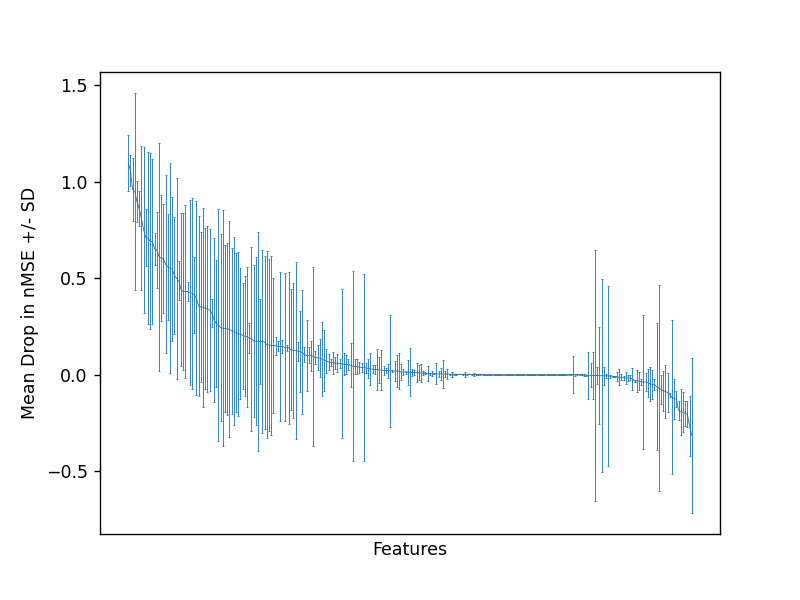

<IPython.core.display.Javascript object>


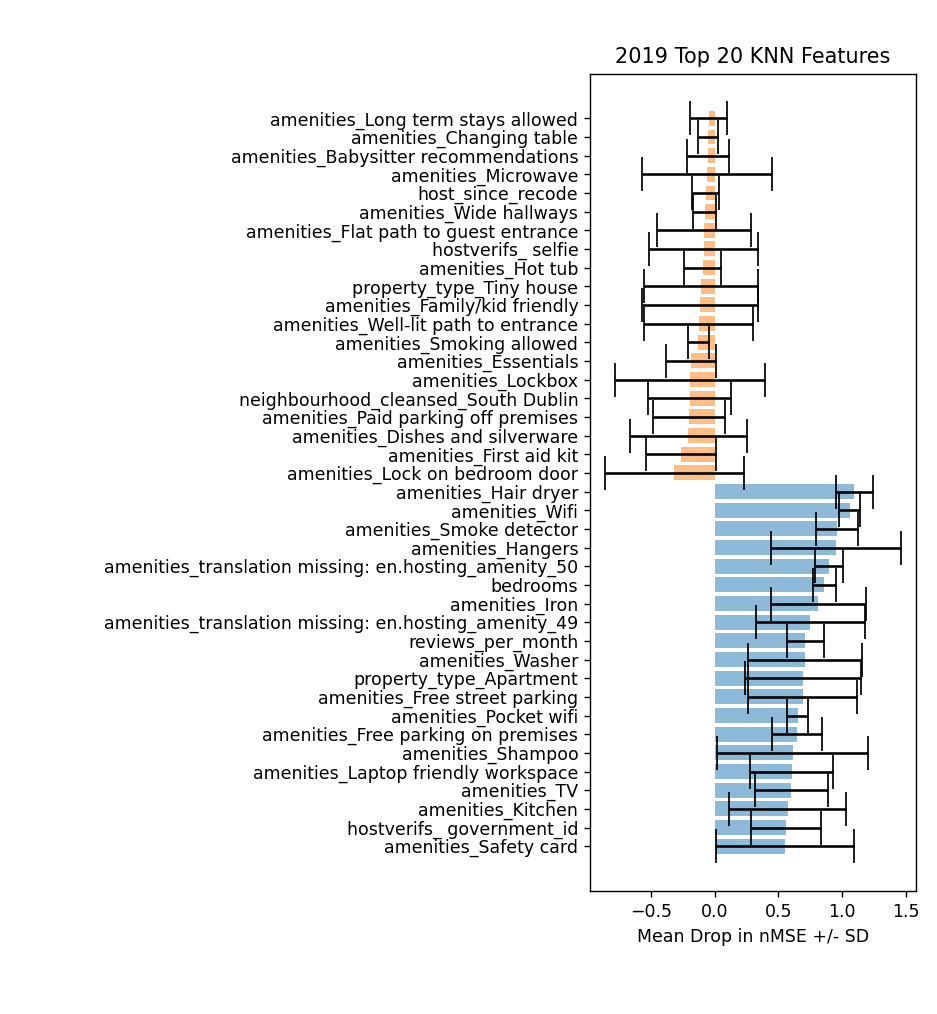

<IPython.core.display.Javascript object>


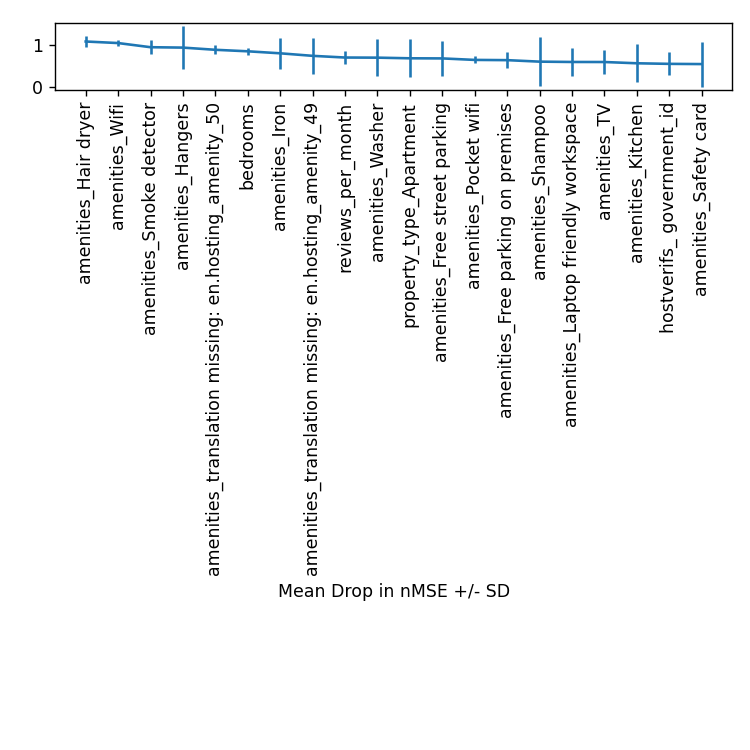

In [12]:
drop_df = pd.DataFrame(mean_mse_drop_array, columns=["mean_mse_drop"])
drop_df["features"] = X19_cols
drop_df["std_mse_drop"] = std_mse_drop_array

drop_df.sort_values(by='mean_mse_drop', ascending=False, inplace=True)

num_features = 20

fig = plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(drop_df.features, drop_df.mean_mse_drop, drop_df.std_mse_drop, linewidth=0.5, dash_capstyle="projecting",capsize = 0.5,capthick=0.5, elinewidth=0.5)
ax.set_xticks([]);
ax.set_xticklabels([]);
ax.set_ylabel("Mean Drop in nMSE +/- SD")
ax.set_xlabel("Features")

fig = plt.figure()
ax=fig.add_subplot(111)
ax.barh(np.flipud(drop_df.features[0:num_features].values),np.flipud(drop_df.mean_mse_drop[0:num_features]), xerr=np.flipud(drop_df.std_mse_drop[0:num_features]), align='center', alpha=0.5, ecolor='black', capsize=10)
#ax.set_xticklabels([]);
ax.set_xlabel("Mean Drop in nMSE +/- SD")
#ax.set_xlabel("Features")
ax.set_title("2019 Top 20 KNN Features")
plt.tight_layout()

fig = plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(drop_df.features[0:num_features],drop_df.mean_mse_drop[0:num_features], drop_df.std_mse_drop[0:num_features])
ax.set_xticklabels(drop_df.features[0:num_features], rotation=90);
ax.set_xlabel("Mean Drop in nMSE +/- SD")
#ax.set_xlabel("Features")
plt.tight_layout()
#ax.set_ylim([0,2])
fig.set_size_inches([6,6])

# good_features = drop_df[drop_df.r2_change < 0].copy()

# fig = plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(good_features.features, good_features.r2_change)
# ax.set_xticklabels(good_features.features, rotation=90);

# plt.tight_layout()